In [12]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import json
from numpy import mean
from numpy import percentile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from statistics import mode

In [13]:
  FOLDER_PATH = "../data/metadata/"
  val_json = FOLDER_PATH + "meta.json"
  t1_path = "../data/t1_annotate/output/sample_output_t1.csv"
  t1_df = pd.read_csv(t1_path)
  t2_path = "../data/t2_guess/output/sample_output_t2.csv"
  t2_df = pd.read_csv(t2_path)
  with open(val_json) as f:
    data = json.load(f)

In [14]:
def get_bbox (select_anno, category_id):
    bounding_box = [
        anno["bbox"]   
        for anno in select_anno
        if anno["category_id"] == category_id        
    ]
    return bounding_box

def get_annotations(data, img_id):
    select_anno = [anno for anno in data["annotations"] if anno["image_id"] == img_id]
    return select_anno

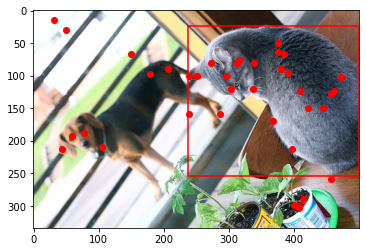

In [27]:
point_list = []
bbox = None
bbox_poly = None
img_id = 0
for index, row in t1_df.iterrows():
    if row['img_id'] != img_id:
        img_id = row['img_id']
        bbox = get_bbox(get_annotations(data, img_id), row['category_id'])[0]
        # Polygon is created upper left and then counter clock wise
        bbox_poly = Polygon([(bbox[0], bbox[1]),(bbox[0], bbox[1] + bbox[3]),
                          (bbox[0] + bbox[2], bbox[1] + bbox[3]),(bbox[0] + bbox[2], bbox[1])])
      # Run through each of the clicks and make a Point, and test if that Point is in the bounding box
    in_box = 0
    total = 0
    worker_id = row['WorkerId']
    for i in range(1, 11):
        if str(row[f"point_{i}"]) != "nan":
            coordinates = str(row[f"point_{i}"]).split(",")
            point = Point(int(coordinates[0]), int(coordinates[1]))
            point_list.append(point)   
            
xs = [point.x for point in point_list]
ys = [point.y for point in point_list]
cat_img = plt.imread("../data/t1_annotate/input/000000022892.jpg")
implot = plt.imshow(cat_img)
plt.plot(*bbox_poly.exterior.xy, c='r')
plt.scatter(xs, ys, c='r')
plt.show()